## Import Libraries and Read data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from collections import defaultdict
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\Internships\Cellula\Projects\First\Hotel-Reservations\first inten project.csv")

## EDA

In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
data.isna().sum().sort_values()

Booking_ID                  0
special requests            0
average price               0
P-not-C                     0
P-C                         0
repeated                    0
market segment type         0
date of reservation         0
lead time                   0
car parking space           0
type of meal                0
number of week nights       0
number of weekend nights    0
number of children          0
number of adults            0
room type                   0
booking status              0
dtype: int64

In [6]:
features_frame = data.drop(['booking status','Booking_ID'], axis= 1)
target = data["booking status"]

<Axes: xlabel='booking status', ylabel='count'>

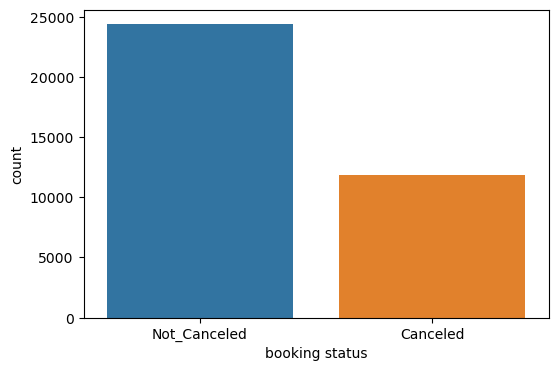

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x="booking status", data= data)

### Categorical Features

<Axes: xlabel='type of meal', ylabel='count'>

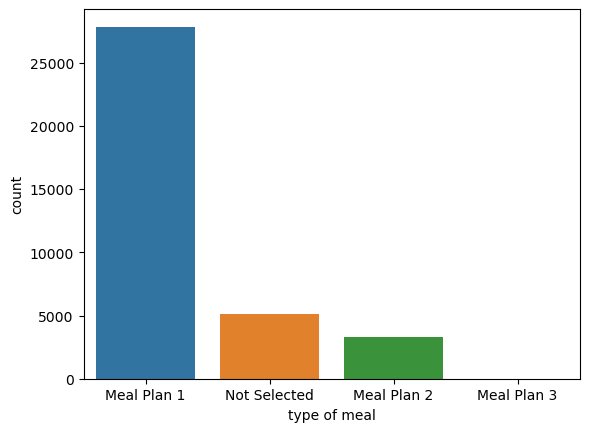

In [8]:
sns.countplot(x="type of meal", data= features_frame)

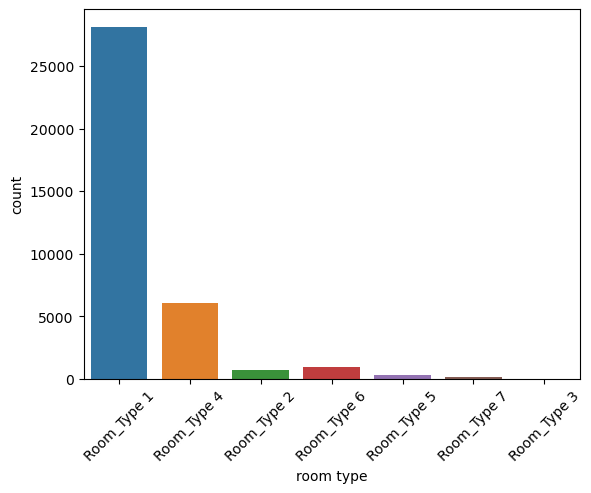

In [9]:
plt.Figure(figsize=(8,8))
room_plot = sns.countplot(x="room type", data= features_frame)
room_plot.set_xticklabels(room_plot.get_xticklabels(), rotation=45)
plt.show()

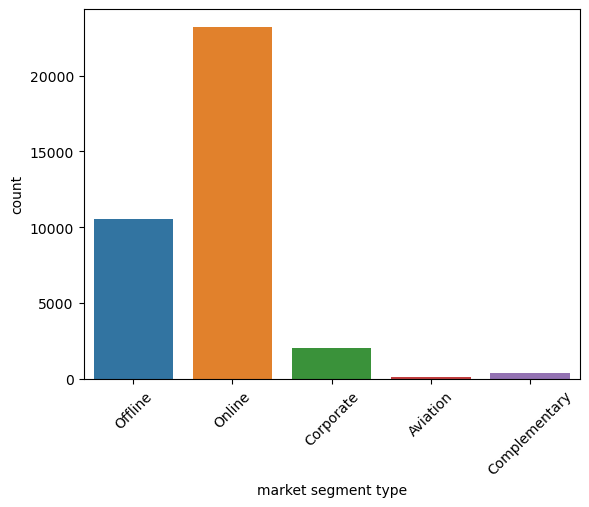

In [10]:
plt.Figure(figsize=(10,3))
room_plot = sns.countplot(x="market segment type", data= features_frame)
room_plot.set_xticklabels(room_plot.get_xticklabels(), rotation=45)
plt.show()

[None]

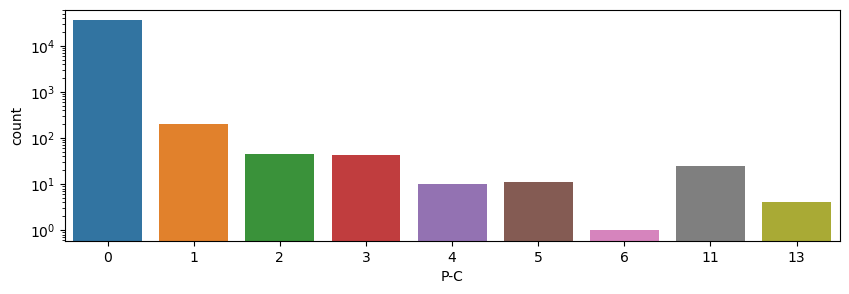

In [11]:
plt.figure(figsize=(10,3))
s = sns.countplot(x= "P-C", data= features_frame)
s.set(yscale= 'log')

[None]

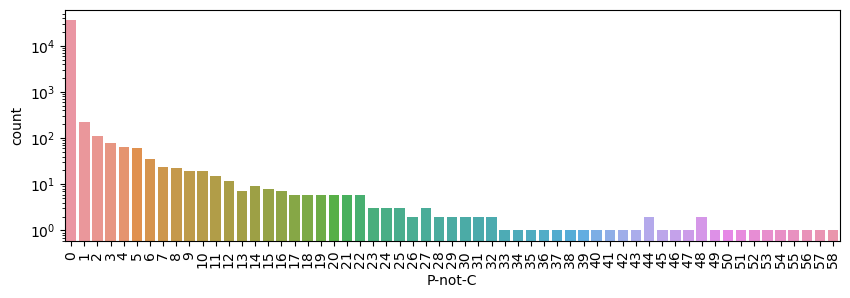

In [12]:
plt.figure(figsize=(10,3))
plot_pnotc = sns.countplot(x= "P-not-C", data= features_frame)
plt.xticks(rotation= 90)
plot_pnotc.set(yscale= 'log')

<Axes: xlabel='car parking space', ylabel='count'>

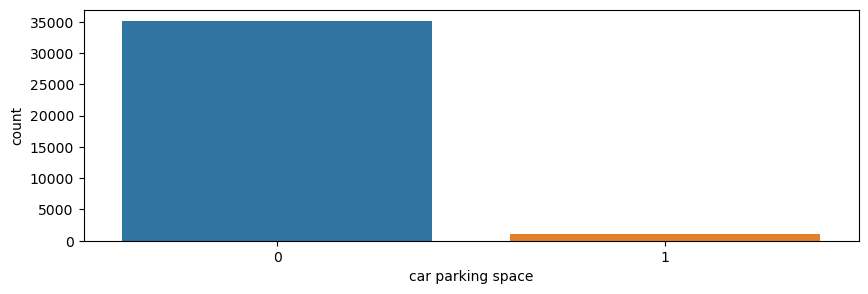

In [13]:
plt.figure(figsize=(10,3))
sns.countplot(x='car parking space', data= features_frame)

<Axes: xlabel='repeated', ylabel='count'>

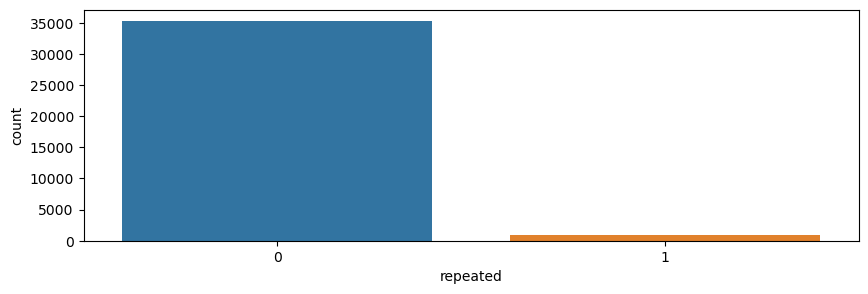

In [14]:
plt.figure(figsize=(10,3))
sns.countplot(x="repeated", data= features_frame)

In [15]:
target = target.reset_index().drop(['index'], axis= 1)
target["booking status"] = np.where(target['booking status'] == 'Not_Canceled',1, 0)

<Axes: xlabel='booking status', ylabel='count'>

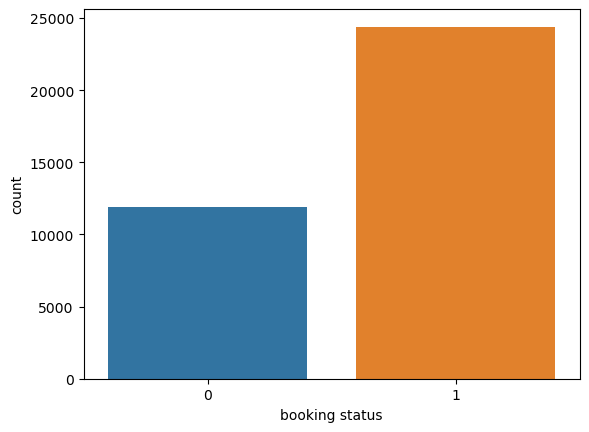

In [16]:
sns.countplot(x='booking status', data= target)

In [17]:
data["booking status"] = data["booking status"].apply(lambda x : 1 if x == 'Not_Canceled' else 0)
df_cat = data[['type of meal','car parking space', 'room type', 'market segment type', 'repeated',"booking status"]]

In [18]:
df_cat

,type of meal,car parking space,room type,market segment type,repeated,booking status
0,Meal Plan 1,0,Room_Type 1,Offline,0,1
1,Not Selected,0,Room_Type 1,Online,0,1
2,Meal Plan 1,0,Room_Type 1,Online,0,0
3,Meal Plan 1,0,Room_Type 1,Online,0,0
4,Not Selected,0,Room_Type 1,Online,0,0
...,...,...,...,...,...,...
36280,Meal Plan 2,0,Room_Type 1,Online,0,0
36281,Meal Plan 1,0,Room_Type 1,Online,0,1
36282,Meal Plan 1,0,Room_Type 4,Online,0,1
36283,Meal Plan 1,0,Room_Type 1,Offline,0,1


In [19]:
meal_target = df_cat.groupby('type of meal')['booking status'].agg(['sum','count'])
meal_target['non_cancelled_ratio'] = (meal_target['sum']) / meal_target['count']
meal_target['cancelled_ratio'] = 1 - meal_target['non_cancelled_ratio']

In [20]:
meal_target = meal_target.reset_index().drop(['sum','count'], axis= 1)

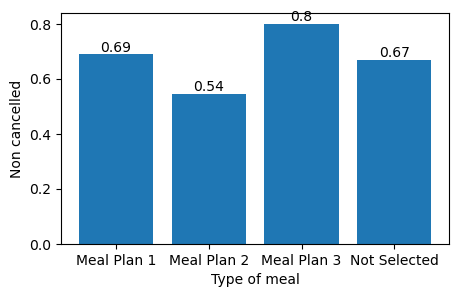

In [21]:
plt.figure(figsize=(5,3))
bars= plt.bar(meal_target['type of meal'], meal_target['non_cancelled_ratio'])
plt.xlabel("Type of meal")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [22]:
car_target = df_cat.groupby("car parking space")["booking status"].agg(["sum","count"]).reset_index()
car_target["non_cancelled_ratio"] = car_target["sum"] / car_target["count"]
car_target.drop(["sum","count"], axis=1, inplace= True)
car_target

,car parking space,non_cancelled_ratio
0,0,0.665112
1,1,0.898577


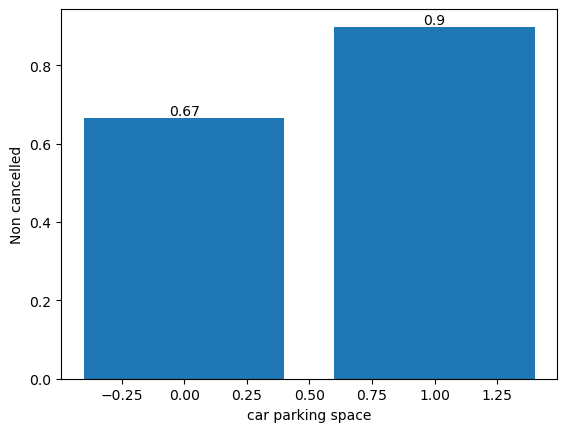

In [23]:
bars = plt.bar(car_target["car parking space"], car_target["non_cancelled_ratio"])
plt.xlabel("car parking space")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [24]:
room_target = df_cat.groupby("room type")["booking status"].agg(["sum","count"]).reset_index()
room_target["non_cancelled_ratio"]  = room_target["sum"] / room_target["count"]
room_target.drop(["sum","count"], axis= 1, inplace= True)
room_target

,room type,non_cancelled_ratio
0,Room_Type 1,0.677447
1,Room_Type 2,0.670520
2,Room_Type 3,0.714286
3,Room_Type 4,0.658525
4,Room_Type 5,0.728302
5,Room_Type 6,0.579710
6,Room_Type 7,0.772152


IndexError: invalid index to scalar variable.

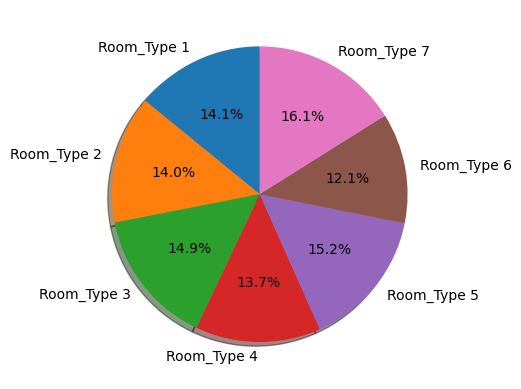

In [25]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(room_target['non_cancelled_ratio'], labels=room_target['room type'], autopct='%1.1f%%', startangle=90,shadow=True)

# Step 5: Add ratios to the pie chart
for i, autotext in enumerate(autotexts):
    ratio = f"{room_target['non_cancelled_ratio'] / room_target['non_cancelled_ratio'].sum()[i]:.2%}"
    autotext.set_text(f"{autotext.get_text()}\n({room_target['non_cancelled_ratio'] / room_target['non_cancelled_ratio'].sum()})")

# Step 6: Display the pie chart
plt.show()

In [26]:
df_cat_not_cancelled = df_cat[df_cat["booking status"] == 1]
df_cat_cancelled = df_cat[df_cat["booking status"] == 0]

In [27]:
pd.crosstab(df_cat_not_cancelled["room type"], df_cat_not_cancelled["type of meal"])

type of meal,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
room type,,,,
Room_Type 1,14139,1569,0,3354
Room_Type 2,443,10,0,11
Room_Type 3,3,0,0,2
Room_Type 4,3769,185,1,35
Room_Type 5,180,5,0,8
Room_Type 6,511,28,0,21
Room_Type 7,116,2,3,1


In [28]:
pd.crosstab(df_cat_cancelled["room type"], df_cat_cancelled["type of meal"])

type of meal,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected
room type,,,,
Room_Type 1,6023,1366,1,1686
Room_Type 2,210,6,0,12
Room_Type 3,2,0,0,0
Room_Type 4,1981,88,0,0
Room_Type 5,62,9,0,1
Room_Type 6,367,38,0,1
Room_Type 7,36,0,0,0


In [29]:
pd.crosstab(df_cat_not_cancelled["room type"], df_cat_not_cancelled["market segment type"], normalize= 'columns')

market segment type,Aviation,Complementary,Corporate,Offline,Online
room type,,,,,
Room_Type 1,0.511364,0.631714,0.921536,0.904026,0.708472
Room_Type 2,0.000000,0.051151,0.001113,0.006642,0.026657
Room_Type 3,0.000000,0.005115,0.000556,0.000271,0.000000
Room_Type 4,0.488636,0.132992,0.043406,0.078081,0.219833
Room_Type 5,0.000000,0.043478,0.028937,0.007727,0.004545
Room_Type 6,0.000000,0.035806,0.001669,0.002711,0.035474
Room_Type 7,0.000000,0.099744,0.002782,0.000542,0.005019


In [30]:
pd.crosstab(df_cat_cancelled["room type"], df_cat_cancelled["market segment type"], normalize= 'index')

market segment type,Aviation,Corporate,Offline,Online
room type,,,,
Room_Type 1,0.001653,0.019502,0.339467,0.639379
Room_Type 2,0.000000,0.000000,0.035088,0.964912
Room_Type 3,0.000000,0.000000,0.000000,1.000000
Room_Type 4,0.010633,0.010150,0.017883,0.961334
Room_Type 5,0.000000,0.305556,0.333333,0.361111
Room_Type 6,0.000000,0.000000,0.007389,0.992611
Room_Type 7,0.000000,0.000000,0.027778,0.972222


In [31]:
market_target = df_cat.groupby('market segment type')['booking status'].agg(['sum','count']).reset_index()
market_target["non_cancelled_ratio"] = market_target["sum"] / market_target["count"]
market_target.drop(["sum","count"], axis= 1, inplace= True)
market_target

,market segment type,non_cancelled_ratio
0,Aviation,0.704000
1,Complementary,1.000000
2,Corporate,0.890927
3,Offline,0.700503
4,Online,0.634899


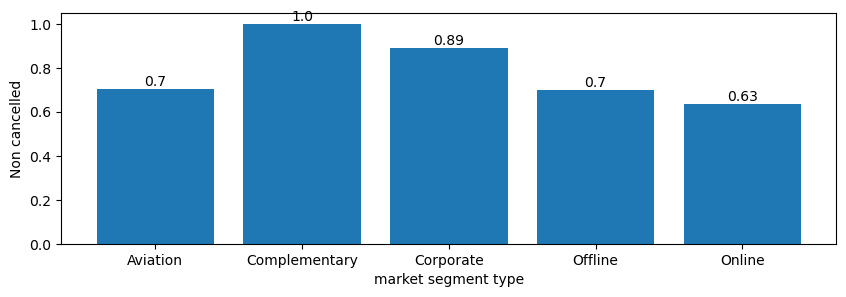

In [32]:
plt.figure(figsize=(10,3))
bars = plt.bar(market_target["market segment type"], market_target["non_cancelled_ratio"])
plt.xlabel("market segment type")
plt.ylabel("Non cancelled")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [33]:
repeated_target = df_cat.groupby("repeated")["booking status"].agg(["sum","count"]).reset_index()
repeated_target["non_cancelled_ratio"] = repeated_target["sum"] / repeated_target["count"]
repeated_target.drop(["sum","count"], axis= 1, inplace= True)
repeated_target

,repeated,non_cancelled_ratio
0,0,0.664178
1,1,0.982796


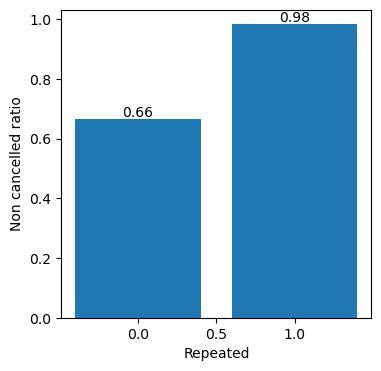

In [34]:
plt.figure(figsize=(4,4))
bars = plt.bar(repeated_target["repeated"], repeated_target["non_cancelled_ratio"])
plt.xlabel("Repeated")
plt.ylabel("Non cancelled ratio")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [35]:
df_cleaned_cat = pd.DataFrame()

In [36]:
df_cleaned_cat["market segment type"] = df_cat["market segment type"].astype('category')
df_cleaned_cat["market segment type"] = df_cleaned_cat["market segment type"].cat.codes

In [37]:
df_cleaned_cat["room type"] = df_cat["room type"].astype('category')
df_cleaned_cat["room type"] = df_cleaned_cat["room type"].cat.codes

In [38]:
df_cleaned_cat["type of meal"] = df_cat["type of meal"].astype('category')
df_cleaned_cat["type of meal"] = df_cleaned_cat["type of meal"].cat.codes

In [39]:
df_cleaned_cat['repeated'] = df_cat['repeated']
df_cleaned_cat['car parking space'] = df_cat['car parking space']

In [40]:
df_cleaned_cat["arrived"] = df_cat["booking status"]

In [41]:
df_cleaned_cat

,market segment type,room type,type of meal,repeated,car parking space,arrived
0,3,0,0,0,0,1
1,4,0,3,0,0,1
2,4,0,0,0,0,0
3,4,0,0,0,0,0
4,4,0,3,0,0,0
...,...,...,...,...,...,...
36280,4,0,1,0,0,0
36281,4,0,0,0,0,1
36282,4,3,0,0,0,1
36283,3,0,0,0,0,1


### Time-Series Analysis

In [47]:
df_time = data[["date of reservation","booking status"]]
df_time.rename(columns={"date of reservation" : "date", "booking status":"non-cancelled"}, inplace= True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_3996\799041069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.rename(columns={"date of reservation" : "date", "booking status":"non-cancelled"}, inplace= True)


In [48]:
# Regular expressions for different date patterns
date_patterns = {
    'YYYY-MM-DD': re.compile(r'\d{4}-\d{1,2}-\d{1,2}'),
    'MM/DD/YYYY': re.compile(r'\d{1,2}/\d{1,2}/\d{4}'),
    'MM-DD-YYYY': re.compile(r'\d{1,2}-\d{1,2}-\d{4}')
}

# Function to identify the date format
def identify_date_format(date_str):
    for fmt, pattern in date_patterns.items():
        if pattern.fullmatch(date_str):
            return fmt
    return 'Unknown'
df_time['date_format'] = df_time['date'].apply(identify_date_format)
df_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_3996\2247863300.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['date_format'] = df_time['date'].apply(identify_date_format)


,date,non-cancelled,date_format
0,10/2/2015,Not_Canceled,MM/DD/YYYY
1,11/6/2018,Not_Canceled,MM/DD/YYYY
2,2/28/2018,Canceled,MM/DD/YYYY
3,5/20/2017,Canceled,MM/DD/YYYY
4,4/11/2018,Canceled,MM/DD/YYYY
...,...,...,...
36280,9/13/2018,Canceled,MM/DD/YYYY
36281,10/15/2017,Not_Canceled,MM/DD/YYYY
36282,12/26/2018,Not_Canceled,MM/DD/YYYY
36283,7/6/2018,Not_Canceled,MM/DD/YYYY


In [49]:
df_time.drop(['date_format'], axis= 1, inplace= True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_3996\2108714430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.drop(['date_format'], axis= 1, inplace= True)


In [50]:
# Function to parse dates with multiple formats
def parse_date(date_str):
    try:
        # Try to parse as YYYY-MM-DD
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        try:
            # Try to parse as MM/DD/YYYY
            return pd.to_datetime(date_str, format='%m/%d/%Y')
        except ValueError:
            try:
                # Try to parse as MM-DD-YYYY
                return pd.to_datetime(date_str, format='%m-%d-%Y')
            except ValueError:
                return pd.NaT

# Apply the function to identify formats

# Parse the dates
df_time['parsed_date'] = df_time['date'].apply(parse_date)

# Extract year, month, day and convert to integers
df_time['year'] = df_time['parsed_date'].dt.year.fillna(0).astype(int)
df_time['month'] = df_time['parsed_date'].dt.month.fillna(0).astype(int)
df_time['day'] = df_time['parsed_date'].dt.day.fillna(0).astype(int)

df_time.drop(['date'], axis= 1, inplace= True)
df_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_3996\2094966168.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['parsed_date'] = df_time['date'].apply(parse_date)
C:\Users\Acer\AppData\Local\Temp\ipykernel_3996\2094966168.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['year'] = df_time['parsed_date'].dt.year.fillna(0).astype(int)
C:\Users\Acer\AppData\Local\Temp\ipykernel_3996\2094966168.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,non-cancelled,parsed_date,year,month,day
0,Not_Canceled,2015-10-02,2015,10,2
1,Not_Canceled,2018-11-06,2018,11,6
2,Canceled,2018-02-28,2018,2,28
3,Canceled,2017-05-20,2017,5,20
4,Canceled,2018-04-11,2018,4,11
...,...,...,...,...,...
36280,Canceled,2018-09-13,2018,9,13
36281,Not_Canceled,2017-10-15,2017,10,15
36282,Not_Canceled,2018-12-26,2018,12,26
36283,Not_Canceled,2018-07-06,2018,7,6


In [53]:
df_time['non_cancelled'] = np.where(df_time['non-cancelled'] == 'Not_Canceled' , 1, 0)
df_time.drop(['non-cancelled'],axis= 1, inplace= True)
df_time

C:\Users\Acer\AppData\Local\Temp\ipykernel_3996\2009328811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['non_cancelled'] = np.where(df_time['non-cancelled'] == 'Not_Canceled' , 1, 0)
C:\Users\Acer\AppData\Local\Temp\ipykernel_3996\2009328811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.drop(['non-cancelled'],axis= 1, inplace= True)


,parsed_date,year,month,day,non_cancelled
0,2015-10-02,2015,10,2,1
1,2018-11-06,2018,11,6,1
2,2018-02-28,2018,2,28,0
3,2017-05-20,2017,5,20,0
4,2018-04-11,2018,4,11,0
...,...,...,...,...,...
36280,2018-09-13,2018,9,13,0
36281,2017-10-15,2017,10,15,1
36282,2018-12-26,2018,12,26,1
36283,2018-07-06,2018,7,6,1


In [24]:
df_time_year = df_time.groupby('year')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_year['non_cancelled_ratio'] = df_time_year['sum'] / df_time_year['count']
df_time_year = df_time_year[df_time_year['year'] > 0]
df_time_year

,year,sum,count,non_cancelled_ratio
1,2015,1,1,1.000000
2,2016,0,1,0.000000
3,2017,5554,6516,0.852363
4,2018,18811,29730,0.632728


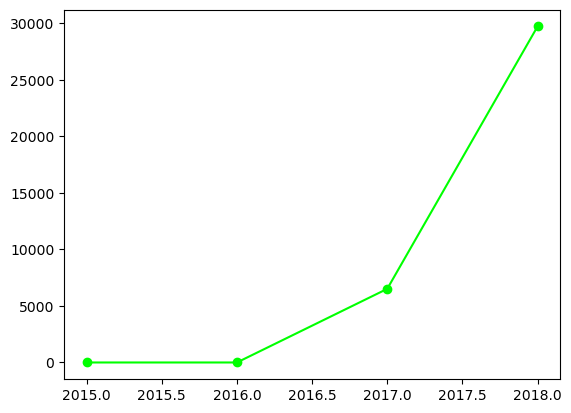

In [25]:
plt.plot(df_time_year['year'], df_time_year['count'], marker='o', color='lime')

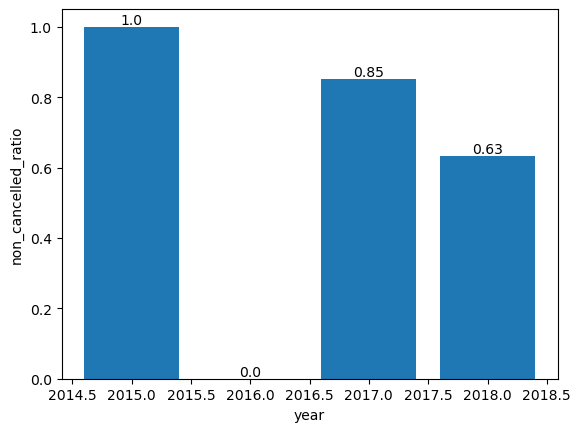

In [28]:
bars= plt.bar(df_time_year['year'], df_time_year['non_cancelled_ratio'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("year")
plt.ylabel("non_cancelled_ratio")
plt.show()

### Notes: 
<ul>
<li>
    2015 has just one transaction which is not okay.
</li>
<li>
    There are many 0 year which means there are many garbage values in the date, like 2018 not being a leap year and it is written that februrary has 29 days which is wrong.
</li>   


In [29]:
df_time_month = df_time.groupby('month')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_month['non_cancelled_ratio'] = df_time_month['sum'] / df_time_month['count']
df_time_month = df_time_month[df_time_month['month'] > 0]
df_time_month

,month,sum,count,non_cancelled_ratio
1,1,990,1014,0.976331
2,2,1244,1668,0.745803
3,3,1658,2358,0.703138
4,4,1741,2737,0.636098
5,5,1650,2599,0.634860
6,6,1912,3203,0.596940
7,7,1607,2921,0.550154
8,8,2325,3813,0.609756
9,9,3073,4612,0.666305
10,10,3440,5320,0.646617


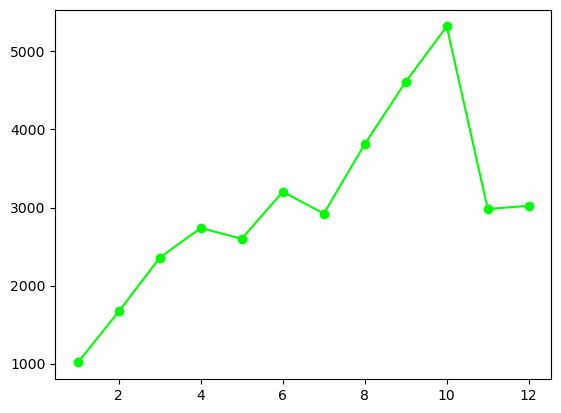

In [31]:
plt.plot(df_time_month['month'], df_time_month['count'], marker='o', color='lime')

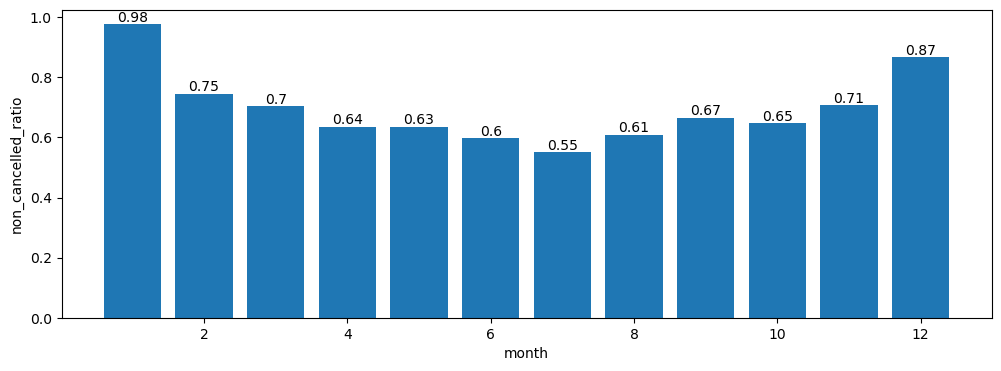

In [35]:
plt.figure(figsize=(12,4))
bars= plt.bar(df_time_month['month'], df_time_month['non_cancelled_ratio'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("month")
plt.ylabel("non_cancelled_ratio")
plt.show()

### Month Notes:
<ul>
    <li>
        The graphs shows that the total transactions are low in winter and high in summer which is logical due to summer vacation seson.
    </li>
    <li>
        However, during winter the non-cancellation ratio is high which may indicate that these are mainly business travels with high rate of non-cancellation.
    </li>
</ul>

In [41]:
df_time_days = df_time.groupby('day')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_days['non_cancelled_ratio'] = df_time_days['sum'] / df_time_days['count']
df_time_days = df_time_days[df_time_days['day'] > 0]
df_time_days.head()

,day,sum,count,non_cancelled_ratio
1,1,668,1133,0.589585
2,2,1024,1332,0.768769
3,3,695,1098,0.632969
4,4,853,1327,0.642803
5,5,826,1154,0.715771


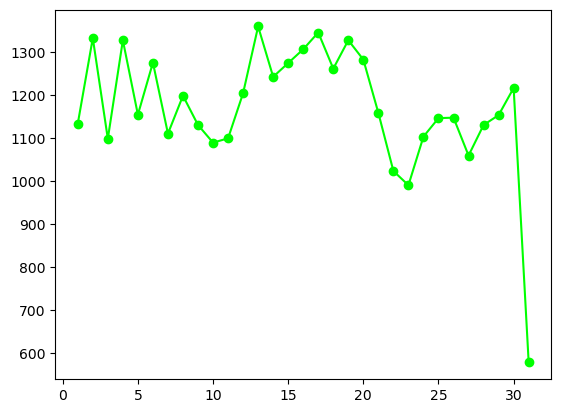

In [39]:
plt.plot(df_time_days['day'], df_time_days['count'], marker='o', color='lime')

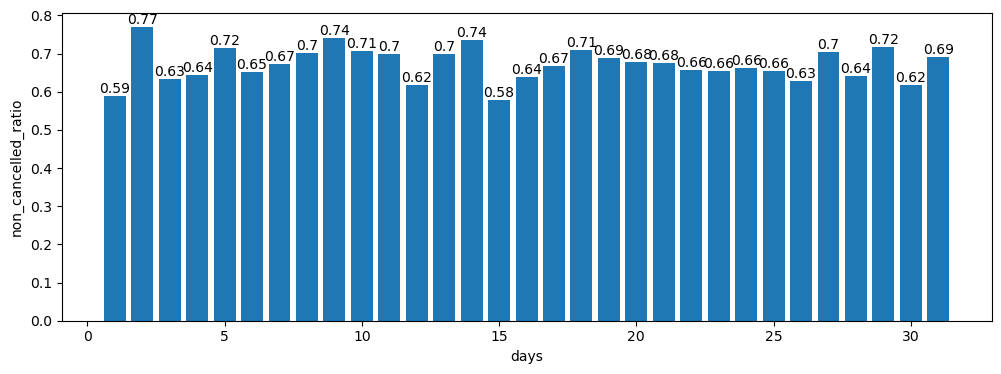

In [40]:
plt.figure(figsize=(12,4))
bars= plt.bar(df_time_days['day'], df_time_days['non_cancelled_ratio'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("days")
plt.ylabel("non_cancelled_ratio")
plt.show()

### Day notes:
No significant observations from the day. (note that 31 is low because not all months have 31 days)

#### 2016 alone

In [45]:
df_time_2017 = df_time[df_time['year'] == 2017]
df_time_month_2017 = df_time_2017.groupby('month')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_month_2017['non_cancelled_ratio'] = df_time_month_2017['sum'] / df_time_month_2017['count']
df_time_month_2017

,month,sum,count,non_cancelled_ratio
0,5,0,1,0.000000
1,7,120,363,0.330579
2,8,829,1014,0.817554
3,9,1467,1649,0.889630
4,10,1612,1914,0.842215
5,11,620,647,0.958269
6,12,906,928,0.976293


In [46]:
df_time_2018 = df_time[df_time['year'] == 2018]
df_time_month_2018 = df_time_2018.groupby('month')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_month_2018['non_cancelled_ratio'] = df_time_month_2018['sum'] / df_time_month_2018['count']
df_time_month_2018

,month,sum,count,non_cancelled_ratio
0,1,990,1014,0.976331
1,2,1244,1668,0.745803
2,3,1658,2358,0.703138
3,4,1741,2737,0.636098
4,5,1650,2598,0.635104
5,6,1912,3203,0.596940
6,7,1487,2558,0.581314
7,8,1496,2799,0.534477
8,9,1606,2962,0.542201
9,10,1827,3405,0.536564


It seems like the bulk of the data is between July 2017 to the end of 2018

In [56]:
df_time_main = df_time[df_time['parsed_date'] > '2017-07-01']
df_time_main = df_time_main.groupby('parsed_date')['non_cancelled'].agg(['sum','count']).reset_index()
df_time_main['non_cancelled_ratio'] = df_time_main['sum'] / df_time_main['count']
df_time_main

,parsed_date,sum,count,non_cancelled_ratio
0,2017-07-02,0,5,0.000000
1,2017-07-03,1,3,0.333333
2,2017-07-04,0,4,0.000000
3,2017-07-05,0,3,0.000000
4,2017-07-06,0,10,0.000000
...,...,...,...,...
543,2018-12-27,122,147,0.829932
544,2018-12-28,63,84,0.750000
545,2018-12-29,83,105,0.790476
546,2018-12-30,74,93,0.795699


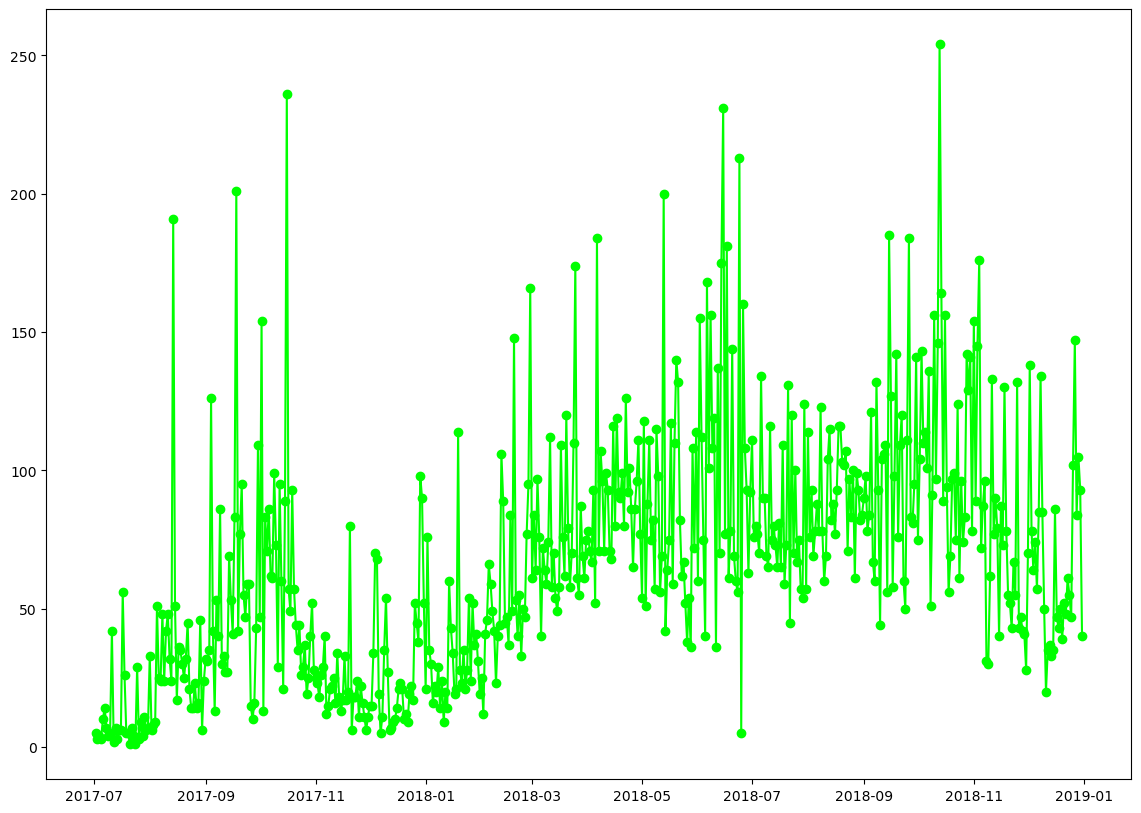

In [59]:
plt.figure(figsize=(14,10))
plt.plot(df_time_main['parsed_date'], df_time_main['count'], marker='o', color='lime')

Let's smooth this curve using moving average.

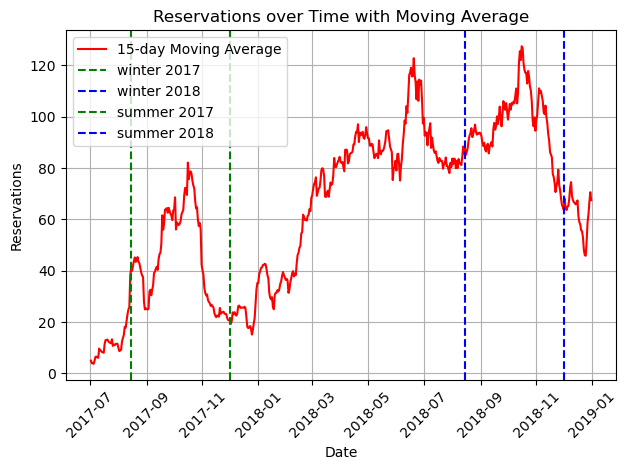

In [71]:
window_size = 15
df_time_main['moving_avg'] = df_time_main['count'].rolling(window= window_size, min_periods=1).mean()
plt.plot(df_time_main['parsed_date'], df_time_main['moving_avg'], label=f'{window_size}-day Moving Average', linestyle='-', color='r')
plt.axvline(x=pd.Timestamp('2017-12-01'), color='g', linestyle='--', label='winter 2017')
plt.axvline(x=pd.Timestamp('2018-12-01'), color='b', linestyle='--', label='winter 2018')
plt.axvline(x=pd.Timestamp('2017-08-15'), color='g', linestyle='--', label='summer 2017')
plt.axvline(x=pd.Timestamp('2018-08-15'), color='b', linestyle='--', label='summer 2018')
plt.title('Reservations over Time with Moving Average')
plt.xlabel('Date')
plt.ylabel('Reservations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Notes:
<ul>
    <li>
        The graphs show significant improvement from 2017 to 2018 in terms of reservations.
    </li>
    <li>
        Summer as noted above is typically higher than winter.
    </li>
</ul>

### Numerical Data

In [42]:
df_numeric = data[['number of adults','number of children','number of weekend nights','number of week nights','lead time',
                  'P-C','P-not-C','average price ','special requests','booking status']]
df_numeric.rename(columns={'average price ':'average price'}, inplace= True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12524\981297889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.rename(columns={'average price ':'average price'}, inplace= True)


In [43]:
df_numeric.describe()

,number of adults,number of children,number of weekend nights,number of week nights,lead time,P-C,P-not-C,average price,special requests,booking status
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,85.239851,0.023343,0.153369,103.421636,0.619733,0.672344
std,0.518813,0.402704,0.870590,1.410946,85.938796,0.368281,1.753931,35.086469,0.786262,0.469365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [44]:
df_numeric.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'lead time', 'P-C', 'P-not-C', 'average price',
       'special requests', 'booking status'],
      dtype='object')

In [45]:
df_numeric_not_c = df_numeric[df_numeric['booking status'] == 1]
df_numeric_c = df_numeric[df_numeric['booking status'] == 0]

In [46]:
df_numeric['number of adults'].value_counts()

number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

### Detecting Outliers

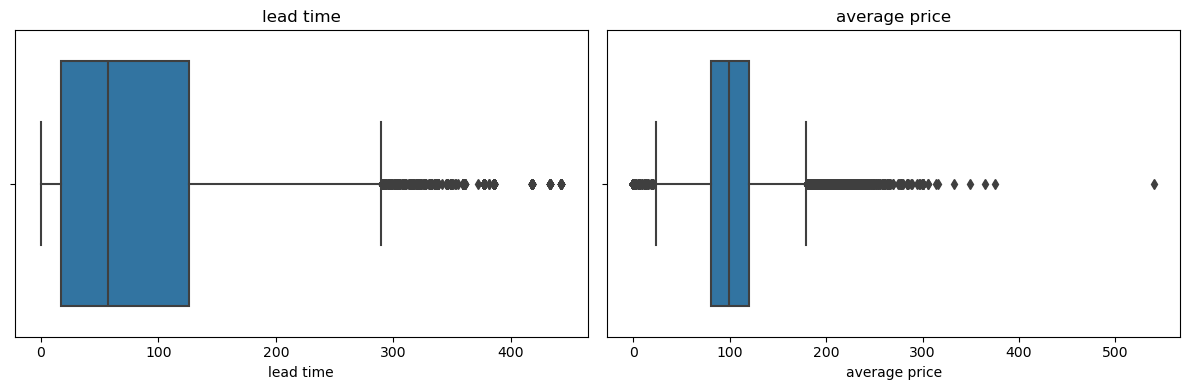

In [47]:
columns = ['lead time', 'average price']
fig, ax = plt.subplots(1,2,figsize=(12, 4))

ax= ax.flatten()
for i, column in enumerate(columns):
    sns.boxplot(x=df_numeric[column], ax=ax[i])
    ax[i].set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

[None]

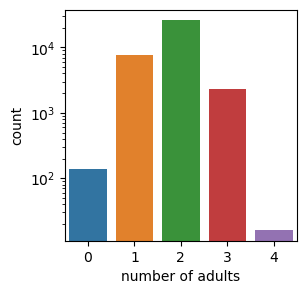

In [48]:
plt.figure(figsize=(3,3))
s = sns.countplot(x="number of adults", data= df_numeric)
s.set(yscale= 'log')

In [49]:
adults_target = df_numeric.groupby('number of adults')['booking status'].agg(["sum","count"]).reset_index()
adults_target['non_cancelled_ratio'] = adults_target["sum"] / adults_target["count"]
adults_target.drop(["sum"],axis= 1, inplace= True)
adults_target

,number of adults,count,non_cancelled_ratio
0,0,139,0.683453
1,1,7702,0.758634
2,2,26110,0.650709
3,3,2318,0.627696
4,4,16,0.812500


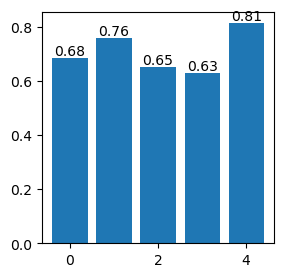

In [50]:
plt.figure(figsize=(3,3))
bars= plt.bar(adults_target["number of adults"], adults_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

[None]

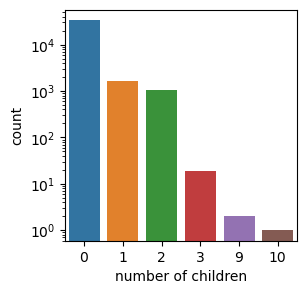

In [51]:
plt.figure(figsize=(3,3))
s = sns.countplot(x="number of children", data= df_numeric)
s.set(yscale= 'log')

In [52]:
children_target = df_numeric.groupby('number of children')['booking status'].agg(["sum","count"]).reset_index()
children_target['non_cancelled_ratio'] = children_target["sum"] / children_target["count"]
children_target.drop(["sum"],axis= 1, inplace= True)
children_target

,number of children,count,non_cancelled_ratio
0,0,33583,0.675878
1,1,1622,0.666461
2,2,1058,0.568053
3,3,19,0.736842
4,9,2,0.500000
5,10,1,1.000000


<br>only 1 row for each 9 and 10, so, outliers</br>

In [53]:
df_numeric["total number"] = df_numeric["number of adults"] + df_numeric["number of children"]
total_target = df_numeric.groupby('total number')['booking status'].agg(["sum","count"]).reset_index()
total_target['non_cancelled_ratio'] = total_target["sum"] / total_target["count"]
total_target.drop(["sum"],axis= 1, inplace= True)
total_target

C:\Users\Acer\AppData\Local\Temp\ipykernel_12524\3508089898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["total number"] = df_numeric["number of adults"] + df_numeric["number of children"]


,total number,count,non_cancelled_ratio
0,1,7556,0.760191
1,2,23946,0.654222
2,3,3853,0.638464
3,4,912,0.563596
4,5,15,0.666667
5,10,1,1.000000
6,11,1,0.000000
7,12,1,1.000000


In [54]:
total_target_2 = total_target.drop(total_target[total_target["total number"] > 5].index)
total_target_2

,total number,count,non_cancelled_ratio
0,1,7556,0.760191
1,2,23946,0.654222
2,3,3853,0.638464
3,4,912,0.563596
4,5,15,0.666667


[None]

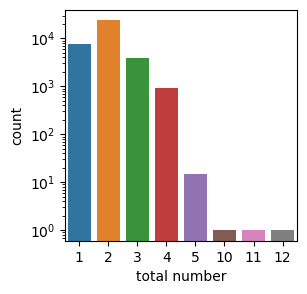

In [55]:
plt.figure(figsize=(3,3))
s = sns.countplot(x="total number", data= df_numeric)
s.set(yscale= 'log')

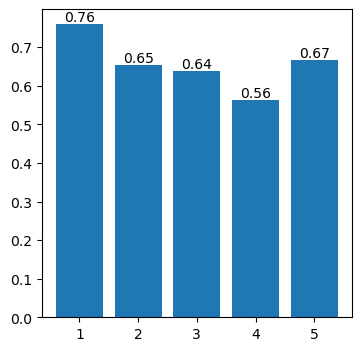

In [56]:
plt.figure(figsize=(4,4))
bars= plt.bar(total_target_2["total number"], total_target_2["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

<p> A new feature to be added "total_number" </p>

In [57]:
nights_target = df_numeric.groupby("number of week nights")["booking status"].agg(["sum","count"]).reset_index()
nights_target["non_cancelled_ratio"] = nights_target["sum"] / nights_target["count"]
nights_target.drop(["sum"],axis= 1, inplace= True)
nights_target

,number of week nights,count,non_cancelled_ratio
0,0,2387,0.715543
1,1,9488,0.728921
2,2,11447,0.650563
3,3,7842,0.671640
4,4,2992,0.617981
5,5,1616,0.608911
6,6,189,0.534392
7,7,113,0.539823
8,8,62,0.483871
9,9,34,0.382353


[None]

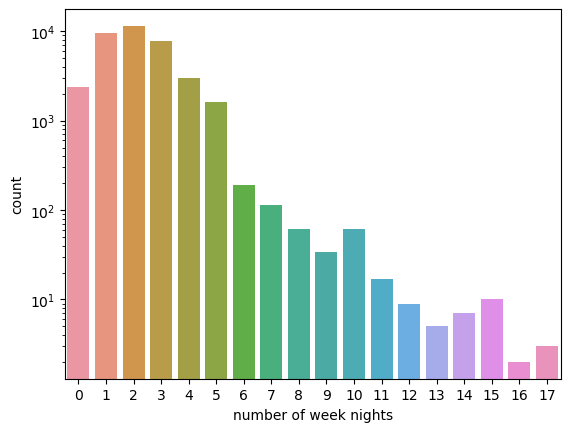

In [58]:
s = sns.countplot(x= "number of week nights", data= df_numeric)
s.set(yscale= 'log')

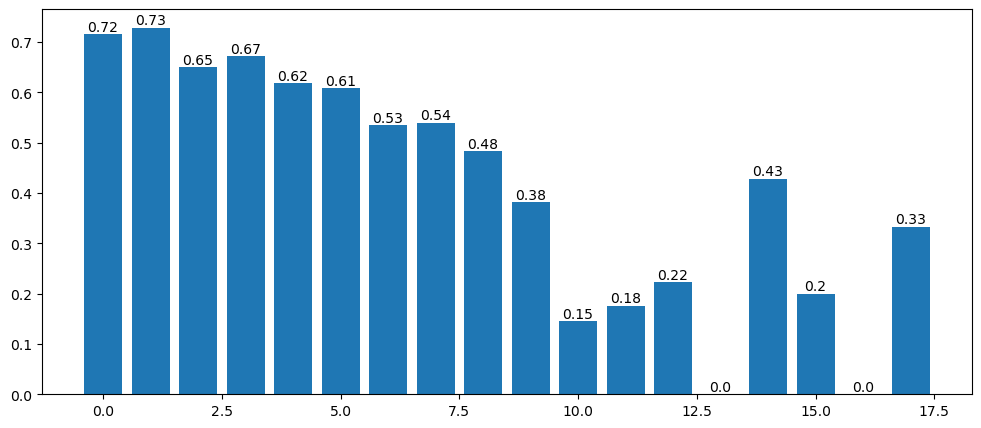

In [59]:
plt.figure(figsize=(12,5))
bars =plt.bar(nights_target["number of week nights"], nights_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [60]:
weekend_target = df_numeric.groupby("number of weekend nights")["booking status"].agg(["sum","count"]).reset_index()
weekend_target["non_cancelled_ratio"] = weekend_target["sum"] / weekend_target["count"]
weekend_target.drop(["sum"],axis= 1, inplace= True)
weekend_target

,number of weekend nights,count,non_cancelled_ratio
0,0,16876,0.698092
1,1,10000,0.656600
2,2,9072,0.652006
3,3,153,0.516340
4,4,129,0.356589
5,5,34,0.147059
6,6,20,0.200000
7,7,1,0.000000


<p> 7 is an outlier </p>

[None]

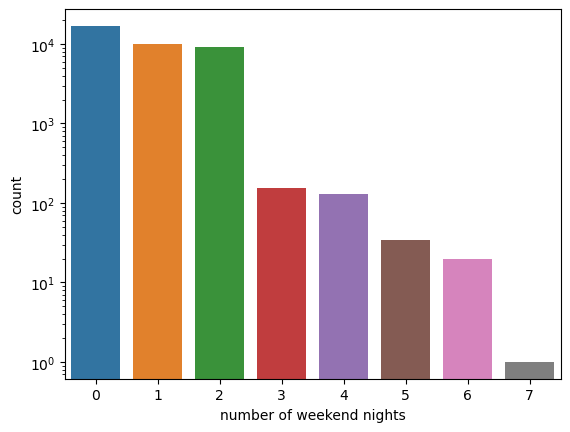

In [61]:
s = sns.countplot(x= "number of weekend nights", data= df_numeric)
s.set(yscale= 'log')

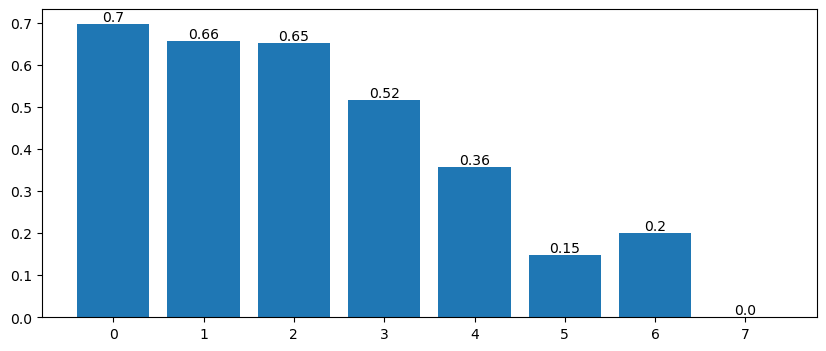

In [62]:
plt.figure(figsize=(10,4))
bars =plt.bar(weekend_target["number of weekend nights"], weekend_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [63]:
df_numeric["total number of nights"] = df_numeric["number of week nights"] + df_numeric["number of weekend nights"]
df_numeric["total number of nights"].sort_values()

C:\Users\Acer\AppData\Local\Temp\ipykernel_12524\518362745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["total number of nights"] = df_numeric["number of week nights"] + df_numeric["number of weekend nights"]


2933      0
7931      0
32704     0
7465      0
2514      0
         ..
34092    22
19745    22
33019    23
16977    23
19512    24
Name: total number of nights, Length: 36285, dtype: int64

In [64]:
number_target = df_numeric.groupby("total number of nights")["booking status"].agg(["sum","count"]).reset_index()
number_target["non_cancelled_ratio"] = number_target["sum"] / number_target["count"]
number_target.drop(["sum"],axis= 1, inplace= True)
number_target

,total number of nights,count,non_cancelled_ratio
0,0,78,0.974359
1,1,6604,0.778013
2,2,8474,0.657659
3,3,10053,0.643191
4,4,5897,0.670680
5,5,2591,0.682362
6,6,1031,0.548982
7,7,974,0.606776
8,8,179,0.558659
9,9,111,0.522523


[None]

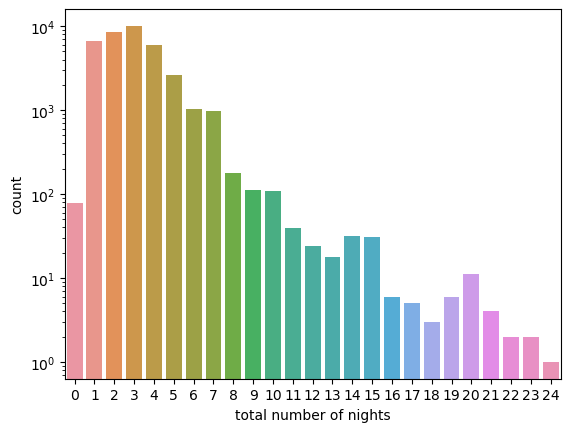

In [65]:
s = sns.countplot(x= "total number of nights", data= df_numeric)
s.set(yscale= 'log')

In [66]:
number_target

,total number of nights,count,non_cancelled_ratio
0,0,78,0.974359
1,1,6604,0.778013
2,2,8474,0.657659
3,3,10053,0.643191
4,4,5897,0.670680
5,5,2591,0.682362
6,6,1031,0.548982
7,7,974,0.606776
8,8,179,0.558659
9,9,111,0.522523


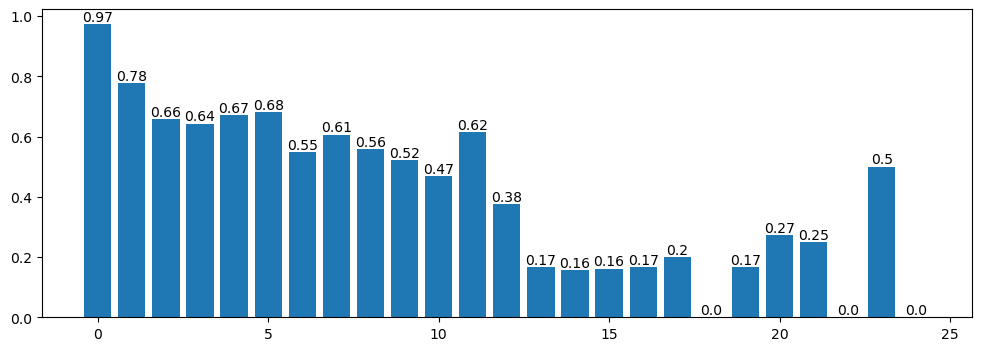

In [67]:
plt.figure(figsize=(12,4))
bars =plt.bar(number_target["total number of nights"], number_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [68]:
df_numeric.rename({"total number" : "total number of people"}, axis=1, inplace= True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12524\3779638111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.rename({"total number" : "total number of people"}, axis=1, inplace= True)


In [69]:
df_numeric

,number of adults,number of children,number of weekend nights,number of week nights,lead time,P-C,P-not-C,average price,special requests,booking status,total number of people,total number of nights
0,1,1,2,5,224,0,0,88.00,0,1,2,7
1,1,0,1,3,5,0,0,106.68,1,1,1,4
2,2,1,1,3,1,0,0,50.00,0,0,3,4
3,1,0,0,2,211,0,0,100.00,1,0,1,2
4,1,0,1,2,48,0,0,77.00,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,346,0,0,115.00,1,0,2,2
36281,2,0,1,3,34,0,0,107.55,1,1,2,4
36282,2,0,1,3,83,0,0,105.61,1,1,2,4
36283,3,0,0,4,121,0,0,96.90,1,1,3,4


In [70]:
price_target = pd.DataFrame({"non-cancelled" : [np.mean(df_numeric_not_c["average price"])], 
                             "cancelled" : [np.mean(df_numeric_c["average price"])]})

price_target.loc[len(price_target)] = [np.std(df_numeric_not_c["average price"]), np.std(df_numeric_c["average price"])]
price_target

,non-cancelled,cancelled
0,99.932994,110.580263
1,35.867813,32.264157


d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\AnaConda\Here\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


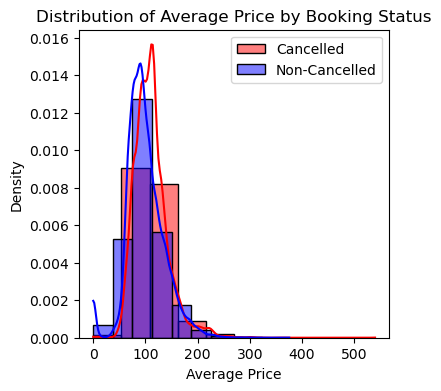

In [71]:
# Plot the distributions
plt.figure(figsize=(4,4))
sns.histplot(df_numeric_c['average price'], bins=10, color='red', label='Cancelled', kde=True, stat='density')
sns.histplot(df_numeric_not_c['average price'], bins=10, color='blue', label='Non-Cancelled', kde=True, stat='density')
plt.xlabel('Average Price')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.title('Distribution of Average Price by Booking Status')
plt.show()

<p>No significant difference in distributions. Maybe not a strong feature</p>

In [72]:
requests_target = df_numeric.groupby("special requests")["booking status"].agg(["sum","count"]).reset_index()
requests_target["non_cancelled_ratio"] = requests_target["sum"] / requests_target["count"]
requests_target.drop(["sum"],axis= 1, inplace= True)
requests_target

,special requests,count,non_cancelled_ratio
0,0,19780,0.567897
1,1,11379,0.762281
2,2,4364,0.854033
3,3,676,1.000000
4,4,78,1.000000
5,5,8,1.000000


[None]

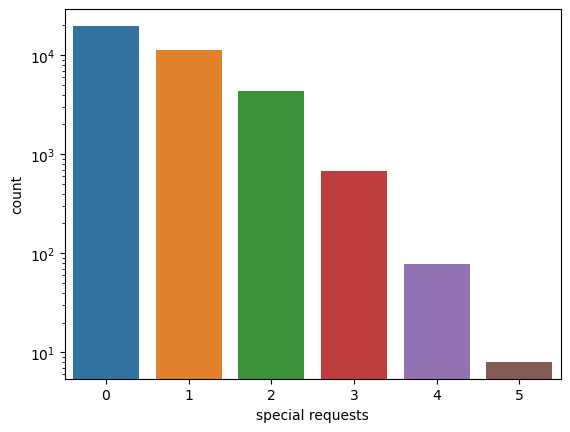

In [73]:
s = sns.countplot(x= "special requests", data= df_numeric)
s.set(yscale= 'log')

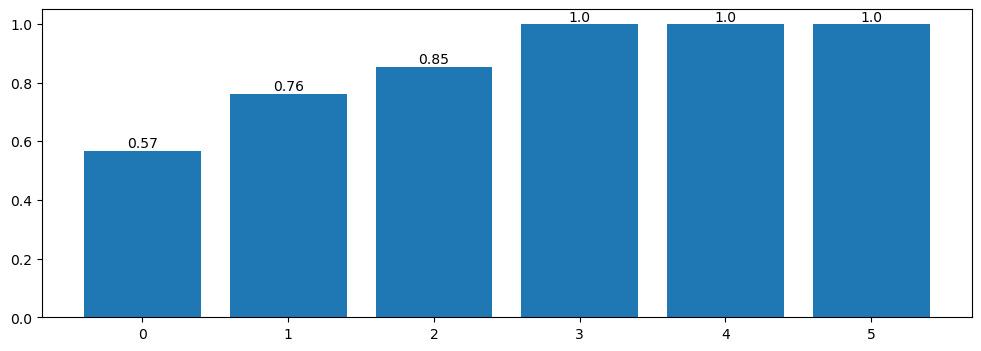

In [74]:
plt.figure(figsize=(12,4))
bars =plt.bar(requests_target["special requests"], requests_target["non_cancelled_ratio"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()